# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

## Helper Functions

In [3]:
"""
Creates cleaned data frame from passed csv
"""
def create_df(csv):
    df = pd.read_csv(csv)
    df = df.rename(columns={'Unnamed: 0' :'Size','Unnamed: 1':'Ticks', 'Unnamed: 2': 'Seconds', 'Unnamed: 3' : 'Memory', 'Unnamed: 4' :'Percent_Sort','Unnamed: 5': 'Algorithm'})
    df = df.dropna()
    df = df.abs()
    return df

In [4]:
"""
create scatter plot for one algorithm 
"""
def single_scatter_plot(df,title,label):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(111)
    ax1.scatter(df['Size'], df['Seconds'], s=10, c='b', marker="s",label = label)
    plt.style.use('default')
    plt.legend(loc='upper left')
    plt.xlabel('Array Size')
    plt.ylabel('Sort Time in Seconds')
    plt.title(title)

    plt.show()

In [5]:
"""
Plots a scatter plot for two algorithms
"""
def double_scatter_plot(df,qdf, algo_one, algo_two, title):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(111)
    ax1.scatter(df['Size'], df['Seconds'], s=10, c='b', marker="s", label=algo_one)
    ax1.scatter(qdf['Size'], qdf['Seconds'], s=10, c='r', marker="o", label=algo_two)
    plt.style.use('default')
    plt.legend(loc='upper left')
    plt.xlabel('Array Size')
    plt.ylabel('Sort Time in Seconds')
    plt.title(title)
    plt.show()

In [6]:
def get_all_graphs(master_frame, algorithm_category_num):
    
    algo_arr = ['Base Quick Sort', 'Insertion Sort', 'Bucket Sort', 'Cudi Sort', '3 Way Quick Sort']
    algo_title_org = algo_arr[algorithm_category_num-1]
    
    zero,twenty,fifty,seven_five,one_hun = get_all_dfs(master_frame, algorithm_category_num)
    for n_degree in range(0,101, 25):
        
        algo_title = algo_title_org
        label = algo_title
        algo_title = algo_title+ " " + str(n_degree) + " Sortedness"
        
        if(n_degree == 0):
            single_scatter_plot(zero, algo_title,label)
        elif(n_degree == 25):
            single_scatter_plot(zero, algo_title,label)
        elif(n_degree == 50):
            single_scatter_plot(zero, algo_title,label)
        elif(n_degree == 75):
            single_scatter_plot(zero, algo_title,label)
        elif(n_degree == 100):
            single_scatter_plot(zero, algo_title,label)      

In [7]:
def graph_linear_regression(df):
    x = np.array(df['Size'])
    y = np.array(df['Seconds'])
    
    lin_reg = LinearRegression()

    lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
    
    y_pred=lin_reg.predict(x.reshape(-1,1))

    # plotting predictions
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,s=15)
    plt.plot(x,y_pred,color='r')
    plt.xlabel('Time in Seconds',fontsize=16)
    plt.ylabel('Array Size',fontsize=16)
    plt.show()

In [8]:
def get_algo_sized_data_frame(df,algorithm_category, n_degree, array_size):
    #small 1-1000
    if array_size == 1:
        df = df[df['Size'] < 1000]
        return df[df['Algorithm']==algorithm_category][df['Percent_Sort']==n_degree]
        
    #medium 1000 - 10000
    elif array_size == 2:
        df = df[df['Size'] > 1000]
        df = df[df['Size'] <10000]
        return df[df['Algorithm']==algorithm_category][df['Percent_Sort']==n_degree]
        
    #large > 10000
    else:
        df = df[df['Size'] > 10000]
        return df[df['Algorithm']==algorithm_category][df['Percent_Sort']==n_degree]

In [9]:
"""
2 - InsertionSort
3 - BucketSort
4 - CudiSort
5 - 3Way QuickSort
6 - HybridSort
7 - Modified BucketSort
8 - Fixed QuickSort
"""
def graph_polynomial_regression(master_frame, algorithm_category, n_degree,array_size):
    
    #algorithm data frame
    df = get_algo_data_frame(master_frame, algorithm_category,n_degree,array_size)
    
    x,y = (df["Size"].values, df["Seconds"].values)
    
    plt.ylabel('Sort Time in Seconds')
    plt.xlabel('Array Size')
    line = np.poly1d(np.polyfit(x,y,2))

    myline = np.linspace(10,1000)
    plt.plot(myline, line(myline), "r", label="Insertion Sort")

    
    plt.legend(loc="upper left")
    print("Sort Regression Equation = \n", line)
    plt.show()

In [10]:
"""
Get unionized frame from all of our data
"""
def get_master_df():
    df1 = create_df('master_l.csv')
    df2 = create_df('master_m.csv')
    df3 = create_df('master_s.csv')
    df4 = create_df('quicksort.csv')
    master_df = pd.concat([df1,df2,df3,df4])
    return master_df

In [11]:
def get_algo_specific_df(master_df, algorithm_category):
    #df[df['Algorithm']==algorithm_category]
    df = master_df[master_df['Algorithm'] == algorithm_category]
    return df

In [12]:
def handy(algo_frame):
    small = algo_frame[algo_frame['Size'] < 1000]
    medium = algo_frame[algo_frame['Size'] > 1000]
    medium = medium[medium['Size'] < 10000]
    large = algo_frame[algo_frame['Size'] > 10000]
    
    return small,medium,large

In [13]:
master_df = get_master_df()

In [14]:
"""
2 - InsertionSort
3 - BucketSort
4 - CudiSort
5 - 3Way QuickSort
6 - HybridSort
7 - Modified BucketSort
8 - Fixed QuickSort
"""

'\n2 - InsertionSort\n3 - BucketSort\n4 - CudiSort\n5 - 3Way QuickSort\n6 - HybridSort\n7 - Modified BucketSort\n8 - Fixed QuickSort\n'

# Crossover values of IS and QS, and IS and BS per degree increment
- N_Degree = 0, 50, 100
- Array size = small 10 < n < 999

In [15]:
quick_df = get_algo_specific_df(master_df, 8)
bucket_df = get_algo_specific_df(master_df, 3)
insertion_df = get_algo_specific_df(master_df,2)

In [16]:
bucket_df['Size'].unique()

array([16592., 46993., 33892., ...,   930.,   817.,   248.])

In [17]:
#Seperate DF's by sort

#N_DEGREE 0
#quick 0 small med large df 
quick0 = quick_df[quick_df['Percent_Sort'] == 0]
q_small0,q_med0,q_large0 = handy(quick0)

#insertion 0 small med large df 
insert0 = insertion_df[insertion_df['Percent_Sort'] == 0]
i_small0,i_med0,i_large0 = handy(insert0)

bucket0 = bucket_df[bucket_df['Percent_Sort'] == 0]
b_small0,b_med0,b_large0 = handy(bucket0)


#N_DEGREE 25
#quick 0 small med large df 
quick25 = quick_df[quick_df['Percent_Sort'] == 25]
q_small25,q_med25,q_large25 = handy(quick25)

#insertion 50 small med large df 
insert25 = insertion_df[insertion_df['Percent_Sort'] == 25]
i_small25,i_med25,i_large25 = handy(insert25)

#bucket 50 small med large df
bucket25 = bucket_df[bucket_df['Percent_Sort'] == 25]
b_small25,b_med25,b_large25 = handy(bucket25)


#N_DEGREE 50
#quick 0 small med large df 
quick50 = quick_df[quick_df['Percent_Sort'] == 50]
q_small50,q_med50,q_large50 = handy(quick50)

#insertion 50 small med large df 
insert50 = insertion_df[insertion_df['Percent_Sort'] == 50]
i_small50,i_med50,i_large50 = handy(insert50)

#bucket 50 small med large df
bucket50 = bucket_df[bucket_df['Percent_Sort'] == 50]
b_small50,b_med50,b_large50 = handy(bucket50)


#N_DEGREE 100
#quick 100 small med large df 
quick100 = quick_df[quick_df['Percent_Sort'] == 100]
q_small100,q_med100,q_large100 = handy(quick100)

#insertion 0 small med large df 
insert100 = insertion_df[insertion_df['Percent_Sort'] == 100]
i_small100,i_med100,i_large100 = handy(insert100)

bucket100 = bucket_df[bucket_df['Percent_Sort'] == 100]
b_small100,b_med100,b_large100 = handy(bucket100)

In [18]:
print(q_small0.shape,i_small0.shape,b_small0.shape)

(9905, 6) (9916, 6) (9915, 6)


In [19]:
#q_small0.head(5)
#i_small0.head(5)
b_small0.head(5)

,Size,Ticks,Seconds,Memory,Percent_Sort,Algorithm
60000,672.0,183.0,0.000183,2688.0,0.0,3.0
60002,679.0,163.0,0.000163,2716.0,0.0,3.0
60004,560.0,139.0,0.000139,2240.0,0.0,3.0
60006,237.0,73.0,0.000073,948.0,0.0,3.0
60008,488.0,129.0,0.000129,1952.0,0.0,3.0


# Cross over graph for small 0 percent sort

Sort Regression Equation = 
            2
1.775e-11 x + 1.162e-07 x - 4.056e-07
Sort Regression Equation = 
            2
6.519e-10 x + 2.982e-08 x + 3.96e-07
Sort Regression Equation = 
             2
-1.385e-10 x + 3.625e-07 x - 4.299e-06


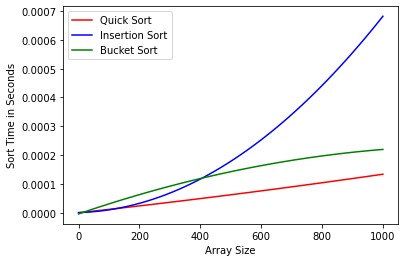

In [20]:
x,y = (q_small0["Size"].values, q_small0["Seconds"].values)
x1,y1 = (i_small0["Size"].values, i_small0["Seconds"].values)
x2,y2 = (b_small0["Size"].values, b_small0["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(0,1000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# Cross over graph for small 50 percent sort

Sort Regression Equation = 
            2
1.902e-11 x + 1.158e-07 x - 2.621e-07
Sort Regression Equation = 
            2
6.671e-10 x + 2.586e-08 x + 1.36e-06
Sort Regression Equation = 
             2
-1.369e-10 x + 3.657e-07 x - 3.29e-06


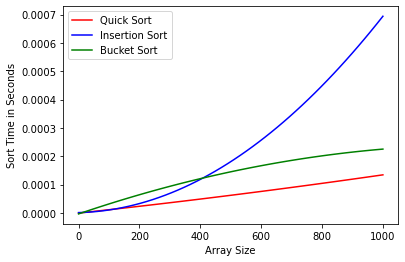

In [21]:
x,y = (q_small50["Size"].values, q_small50["Seconds"].values)
x1,y1 = (i_small50["Size"].values, i_small50["Seconds"].values)
x2,y2 = (b_small50["Size"].values, b_small50["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(0,1000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# Cross over graph for small 50 percent sort

Sort Regression Equation = 
            2
3.443e-09 x + 4.886e-08 x + 3.126e-06
Sort Regression Equation = 
             2
-1.108e-14 x + 5.096e-09 x + 1.323e-06
Sort Regression Equation = 
            2
1.696e-11 x + 1.107e-07 x + 6.275e-06


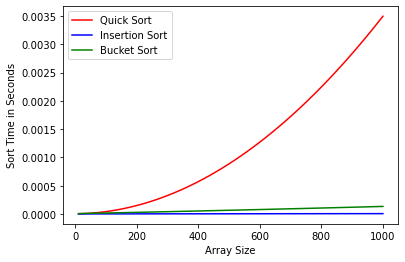

In [22]:
x,y = (q_small100["Size"].values, q_small100["Seconds"].values)
x1,y1 = (i_small100["Size"].values, i_small100["Seconds"].values)
x2,y2 = (b_small100["Size"].values, b_small100["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(10,1000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# Cross over 0 med 

Sort Regression Equation = 
            2
1.067e-12 x + 1.589e-07 x - 3.554e-05
Sort Regression Equation = 
           2
7.79e-12 x + 1.502e-07 x + 7.404e-05


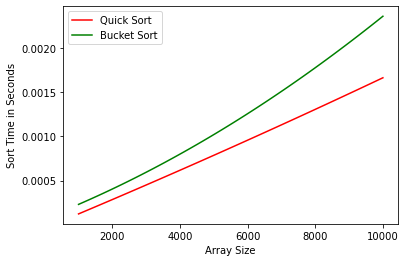

In [23]:
x,y = (q_med0["Size"].values, q_med0["Seconds"].values)
x1,y1 = (i_med0["Size"].values, i_med0["Seconds"].values)
x2,y2 = (b_med0["Size"].values, b_med0["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(1000,10000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
#plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# Cross over 50 med 

Sort Regression Equation = 
            2
1.334e-12 x + 1.562e-07 x - 2.872e-05
Sort Regression Equation = 
            2
8.361e-12 x + 1.433e-07 x + 8.524e-05


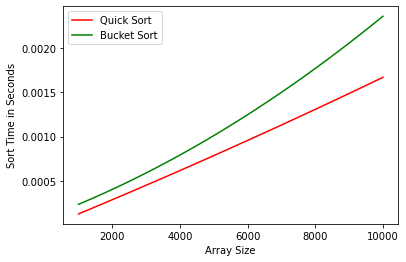

In [24]:
x,y = (q_med50["Size"].values, q_med50["Seconds"].values)
x1,y1 = (i_med50["Size"].values, i_med50["Seconds"].values)
x2,y2 = (b_med50["Size"].values, b_med50["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(1000,10000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# Cross over 100 med 

Sort Regression Equation = 
           2
3.34e-09 x + 8.923e-08 x + 7.971e-05
Sort Regression Equation = 
            2
8.059e-12 x + 1.235e-07 x + 5.49e-06


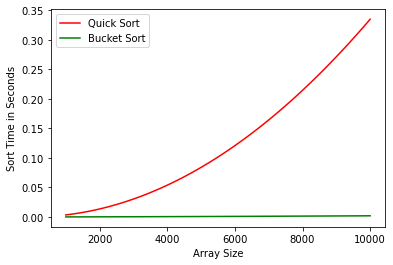

In [25]:
x,y = (q_med100["Size"].values, q_med100["Seconds"].values)
x1,y1 = (i_med100["Size"].values, i_med100["Seconds"].values)
x2,y2 = (b_med100["Size"].values, b_med100["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(1000,10000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
#plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# cross over 0 large 

Sort Regression Equation = 
            2
9.047e-14 x + 1.93e-07 x - 0.0002943
Sort Regression Equation = 
            2
7.437e-13 x + 2.939e-07 x - 0.0006589


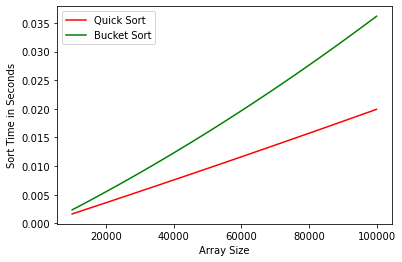

In [26]:
x,y = (q_large0["Size"].values, q_large0["Seconds"].values)
x1,y1 = (i_large0["Size"].values, i_large0["Seconds"].values)
x2,y2 = (b_large0["Size"].values, b_large0["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(10000,100000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
#plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# cross over 50 large 

Sort Regression Equation = 
            2
2.426e-13 x + 1.82e-07 x - 0.0001758
Sort Regression Equation = 
            2
7.788e-13 x + 2.872e-07 x - 0.0006123


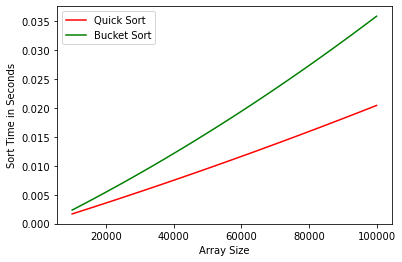

In [27]:
x,y = (q_large50["Size"].values, q_large50["Seconds"].values)
x1,y1 = (i_large50["Size"].values, i_large50["Seconds"].values)
x2,y2 = (b_large50["Size"].values, b_large50["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(10000,100000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
#plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

# cross over 100 large

Sort Regression Equation = 
            2
3.335e-09 x + 7.932e-07 x - 0.007661
Sort Regression Equation = 
             2
-1.291e-13 x + 3.026e-07 x - 0.001003


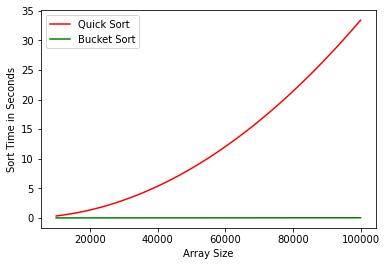

In [28]:
x,y = (q_large100["Size"].values, q_large100["Seconds"].values)
x1,y1 = (i_large100["Size"].values, i_large100["Seconds"].values)
x2,y2 = (b_large100["Size"].values, b_large100["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(10000,100000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
#plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
#print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

Sort Regression Equation = 
            2
1.688e-11 x + 1.177e-07 x - 6.975e-07
Sort Regression Equation = 
            2
6.483e-10 x + 3.386e-08 x + 4.657e-07
Sort Regression Equation = 
             2
-1.441e-10 x + 3.683e-07 x - 4.578e-06


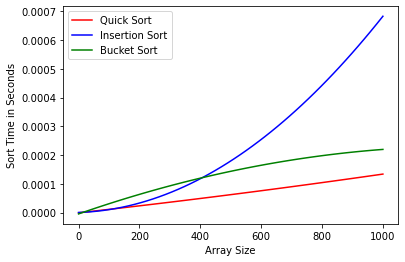

In [29]:
x,y = (q_small25["Size"].values, q_small25["Seconds"].values)
x1,y1 = (i_small25["Size"].values, i_small25["Seconds"].values)
x2,y2 = (b_small25["Size"].values, b_small25["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(0,1000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

In [30]:
#N_DEGREE 75
#quick 0 small med large df 
quick75 = quick_df[quick_df['Percent_Sort'] == 75]
q_small75,q_med75,q_large75 = handy(quick75)

#insertion 50 small med large df 
insert75 = insertion_df[insertion_df['Percent_Sort'] == 75]
i_small75,i_med75,i_large75 = handy(insert75)

#bucket 50 small med large df
bucket75 = bucket_df[bucket_df['Percent_Sort'] == 75]
b_small75,b_med75,b_large75 = handy(bucket75)

Sort Regression Equation = 
            2
2.258e-11 x + 1.128e-07 x + 6.106e-09
Sort Regression Equation = 
            2
6.555e-10 x + 2.923e-08 x + 5.107e-07
Sort Regression Equation = 
             2
-1.372e-10 x + 3.581e-07 x - 3.294e-06


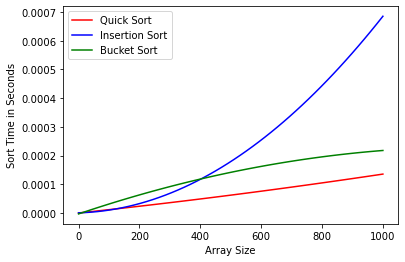

In [31]:
x,y = (q_small75["Size"].values, q_small75["Seconds"].values)
x1,y1 = (i_small75["Size"].values, i_small75["Seconds"].values)
x2,y2 = (b_small75["Size"].values, b_small75["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))
line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(0,1000)
plt.plot(myline , line(myline), "r", label="Quick Sort")
plt.plot(myline, line1(myline), "b", label="Insertion Sort")
plt.plot(myline, line2(myline), "g", label="Bucket Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)
print("Sort Regression Equation = \n", line2)
plt.show()

In [32]:
x = 100
p = create_df('hs_mbs_l.csv')
c = create_df('cudi.csv')
hs_df = p[p['Algorithm']==6][p['Percent_Sort']==x]
mbs_df = p[p['Algorithm']==7][p['Percent_Sort']==x]
c_df = c[c['Algorithm']==4][c['Percent_Sort']==x]
c_dff = c_df[c_df['Size'] < 10000]

C:\Users\river\AppData\Local\Temp/ipykernel_19060/3223020796.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hs_df = p[p['Algorithm']==6][p['Percent_Sort']==x]
C:\Users\river\AppData\Local\Temp/ipykernel_19060/3223020796.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mbs_df = p[p['Algorithm']==7][p['Percent_Sort']==x]


Sort Regression Equation = 
            2
3.383e-09 x - 4.061e-06 x + 0.03969
Sort Regression Equation = 
            2
6.555e-10 x + 2.923e-08 x + 5.107e-07


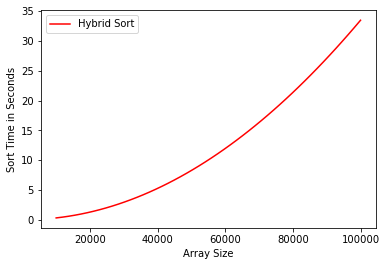

In [33]:
x,y = (hs_df["Size"].values, hs_df["Seconds"].values)
x1,y1 = (mbs_df["Size"].values, mbs_df["Seconds"].values)
#x2,y2 = (c_dff["Size"].values, c_dff["Seconds"].values)

plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
#line1 = np.poly1d(np.polyfit(x1,y1,2))
#line2 = np.poly1d(np.polyfit(x2,y2,2))


myline = np.linspace(10000,100000)
plt.plot(myline , line(myline), "r", label="Hybrid Sort")
#plt.plot(myline, line1(myline), "b", label="Modified Bucket Sort")
#plt.plot(myline, line2(myline), "g", label="Cudi Sort")


plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)

plt.show()

In [42]:
x = 0
s = 1000
p = create_df('hs_mbs_new.csv')
hs_df = p[p['Algorithm']==6][p['Percent_Sort']==x]
mbs_df = p[p['Algorithm']==7][p['Percent_Sort']==x]
hs_df = hs_df[hs_df['Size'] < s]
mbs_df = mbs_df[mbs_df['Size'] < s]

C:\Users\river\AppData\Local\Temp/ipykernel_19060/1927073632.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hs_df = p[p['Algorithm']==6][p['Percent_Sort']==x]
C:\Users\river\AppData\Local\Temp/ipykernel_19060/1927073632.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mbs_df = p[p['Algorithm']==7][p['Percent_Sort']==x]


Sort Regression Equation = 
            2
7.644e-12 x + 6.028e-08 x + 3.082e-06
Sort Regression Equation = 
            2
1.775e-11 x + 1.162e-07 x - 4.056e-07


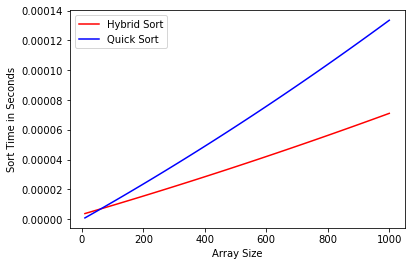

In [43]:
x,y = (hs_df["Size"].values, hs_df["Seconds"].values)
x1,y1 = (q_small0["Size"].values, q_small0["Seconds"].values)


plt.ylabel('Sort Time in Seconds')
plt.xlabel('Array Size')
line = np.poly1d(np.polyfit(x,y,2))
line1 = np.poly1d(np.polyfit(x1,y1,2))



myline = np.linspace(10,1000)
plt.plot(myline , line(myline), "r", label="Hybrid Sort")
plt.plot(myline, line1(myline), "b", label="Quick Sort")



plt.legend(loc="upper left")
print("Sort Regression Equation = \n", line)
print("Sort Regression Equation = \n", line1)

plt.show()